# Chemical Oceanography (CO)

<img src="rosette-launch.jpeg"/>


This tutorial is part of our Chemical Oceanography day. It demonstrates how to do basic analysis and visualization of chemical element observations in the ocean. We will use A,B,and C data which can be downloaded using CMAP API, a giant data database for Earth system observations and modeling. To download the data using API, please register at CMAP and generate your API key.

### Estimated tutorial time: 1.5 hours

## Tutorial goals

- Python Skills
    - Work with dataframes
    - Make different statistical plots
    - Data co-location
- CO knowledge
    - Learn the distribution of nutrients in the ocean 
    - Understand the acidification and deoxygenation in the ocean
    
## Reading 

https://www.noaa.gov/education/resource-collections/ocean-coasts/ocean-acidification

# Let's start!

In [1]:
import pandas as pd
import numpy as np
import pycmap
import plotly.express as px

import matplotlib.pyplot as plt

import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.

### Call API

#### get api key by registering for account on simonscmap.com then going to https://simonscmap.com/apikeymanagement

In [2]:
# call api using your unique api key
key = '68485f40-0458-11ed-b189-4fe042c5db72'
api = pycmap.API(token=key)

In [3]:
# get catalog of all datasets- very long
# api.get_catalog()

# search for a dataset with a specific keyword
# api.search_catalog('carbon')

### HOT: Hawaii Ocean Time-series

In [4]:
HOT_bottle = api.get_dataset('tblHOT_Bottle')
HOT_bottle.keys()

Index(['botid_HOT', 'time', 'date_time', 'pressure_ctd_bottle_hot',
       'potential_temperature_ctd_bottle_hot',
       'potential_density_ctd_bottle_hot', 'temperature_ctd_bottle_hot',
       'salinity_ctd_bottle_hot', 'oxygen_ctd_bottle_hot',
       'salinity_bottle_hot', 'oxygen_bottle_hot', 'dic_bottle_hot',
       'ph_bottle_hot', 'alk_bottle_hot', 'PO4_bottle_hot',
       'NO2_NO3_bottle_hot', 'SiO4_bottle_hot', 'dop_bottle_hot',
       'don_bottle_hot', 'doc_bottle_hot', 'tdp_bottle_hot', 'tdn_bottle_hot',
       'pc_bottle_hot', 'pn_bottle_hot', 'pp_bottle_hot', 'lln_bottle_hot',
       'llp_bottle_hot', 'chl_bottle_hot', 'phaeo_bottle_hot',
       'HPLC_chl3_bottle_hot', 'HPLC_chl12_bottle_hot',
       'HPLC_chlplus_bottle_hot', 'HPLC_peridinin_bottle_hot',
       'HPLC_but19_bottle_hot', 'HPLC_fuco_bottle_hot',
       'HPLC_hex19_bottle_hot', 'HPLC_prasino_bottle_hot',
       'HPLC_diadino_bottle_hot', 'HPLC_zeaxan_bottle_hot',
       'HPLC_chlb_bottle_hot', 'HPLC_chla_bott

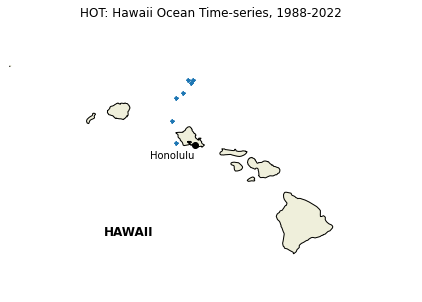

In [11]:
Lon_Honolulu=360-157.8581; Lat_Honolulu=21.3099

plt.figure(figsize=(15,5))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)); #this specifies which projection to use
ax.set_extent(( 198,207, 18,24), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)

ax.scatter(HOT_bottle['lon'],HOT_bottle['lat'],5,transform=ccrs.PlateCarree())
plt.title('HOT: Hawaii Ocean Time-series, 1988-2022')
ax.plot(Lon_Honolulu,Lat_Honolulu, 'ko', alpha=1,transform=ccrs.PlateCarree())

plt.text(Lon_Honolulu-1,Lat_Honolulu-0.3,      # add a text label
         'Honolulu',transform=ccrs.PlateCarree())

plt.text(Lon_Honolulu-2,Lat_Honolulu-2,      # add a text label
         'HAWAII',weight="bold", fontsize=12, transform=ccrs.PlateCarree())
plt.axis("off");

## Ocean acidification

<img src="acidification.jpeg"/>

https://www.noaa.gov/education/resource-collections/ocean-coasts/ocean-acidification


What is commonly referred to as "acidity" is the concentration of hydrogen ions (H+) in an aqueous solution. The concentration of hydrogen ions is expressed on a logarithmic pH scale scale. Many natural processes affect acidity levels in the environment, including photosynthesis and respiration, so the acidity may vary dramatically as a result of natural biological, physical, and geological processes on a variety of different spatial and temporal scales. 

Ocean acidification, related to the uptake of CO2 at the ocean surface, causes a relatively slow, long-term increase in the acidity of the ocean, corresponding to a decrease in pH. Many organisms are very sensitive to seemingly small changes in pH. https://www.pmel.noaa.gov/co2/story/A+primer+on+pH





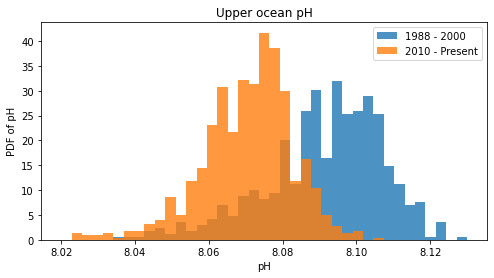

In [6]:
plt.figure(figsize=(8,4))

ind1=(HOT_bottle['time'] < '2000') &(HOT_bottle['depth'] <100)
plt.hist(HOT_bottle[ind1]['ph_bottle_hot'], 
         bins=np.linspace(8.02, 8.13, 40), density=True, alpha=0.8, 
         label='1988 - 2000');

ind2=(HOT_bottle['time'] > '2010') &(HOT_bottle['depth'] <100)
plt.hist(HOT_bottle[ind2]['ph_bottle_hot'], 
         bins=np.linspace(8.02, 8.13, 40),  density=True,alpha=0.8,
         label='2010 - Present');

plt.legend()
plt.title('Upper ocean pH')
plt.xlabel('pH')
plt.ylabel('PDF of pH');
plt.savefig('Acidification.pdf');

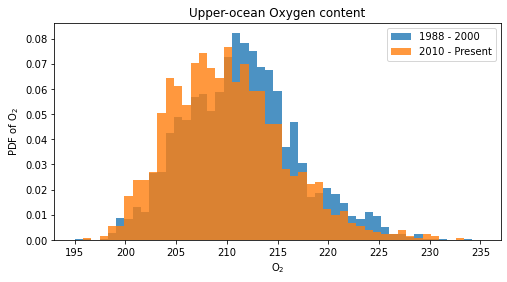

In [7]:
plt.figure(figsize=(8,4))

plt.hist(HOT_bottle[ind1]['oxygen_bottle_hot'], 
          density=True,
          bins=np.linspace(195, 235, 50), 
          alpha=0.8, label='1988 - 2000');

plt.hist(HOT_bottle[ind2]['oxygen_bottle_hot'], 
         density=True,
         bins=np.linspace(195, 235, 50), 
         alpha=0.8, label='2010 - Present');

plt.legend()
plt.title('Upper-ocean Oxygen content')
plt.xlabel('O$_2$')
plt.ylabel('PDF of O$_2$');
plt.savefig('Deoxygenation.pdf');

In [8]:
O2_fractional_change=HOT_bottle[ind2]['oxygen_bottle_hot'].mean()/HOT_bottle[ind1]['oxygen_bottle_hot'].mean()-1
print(O2_fractional_change)

-0.00646508748907948


## Redfield Ratio 

<img src="CNP.png" width=600/>

The Redfield ratio or Redfield stoichiometry is the consistent atomic ratio of carbon, nitrogen and phosphorus found in marine phytoplankton and throughout the deep oceans.

The term is named for American oceanographer Alfred C. Redfield who in 1934 first described the relatively consistent ratio of nutrients in marine biomass samples collected across several voyages on board the research vessel Atlantis, and empirically found the ratio to be C:N:P = 106:16:1. While deviations from the canonical 106:16:1 ratio have been found depending on phytoplankton species and the study area, the Redfield ratio has remained an important reference to oceanographers studying nutrient limitation. A 2014 paper summarizing a large data set of nutrient measurements across all major ocean regions spanning from 1970 to 2010 reported the global median C:N:P to be 163:22:1. https://en.wikipedia.org/wiki/Redfield_ratio


Gruber, N., & Deutsch, C. A. (2014). Redfield's evolving legacy. Nature Geoscience, 7(12), 853-855. https://www.nature.com/articles/ngeo2308

Moore, C. M., Mills, M. M., Arrigo, K. R., Berman-Frank, I., Bopp, L., Boyd, P. W., ... & Ulloa, O. (2013). Processes and patterns of oceanic nutrient limitation. Nature geoscience, 6(9), 701-710. https://www.nature.com/articles/ngeo1765

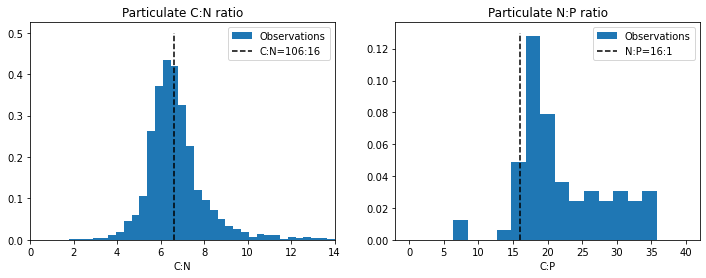

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(HOT_bottle['pc_bottle_hot']/HOT_bottle['pn_bottle_hot'],
         bins=np.linspace(0,14,40),density=True,
         label='Observations');
plt.plot([106/16, 106/16],[0, 0.5],'k--',label='C:N=106:16')
plt.legend()
plt.title('Particulate C:N ratio')
plt.xlabel('C:N')

plt.xlim((0,14));

plt.subplot(1,2,2)
plt.hist(HOT_bottle['pn_bottle_hot']/(1e-3*HOT_bottle['pp_bottle_hot']),
         label='Observations',
         bins=np.linspace(0,40,20),density=True);
plt.plot([16, 16],[0, 0.13],'k--',label='N:P=16:1')
plt.legend()
plt.xlabel('C:P')
plt.title('Particulate N:P ratio');
plt.savefig('Redfield.pdf')

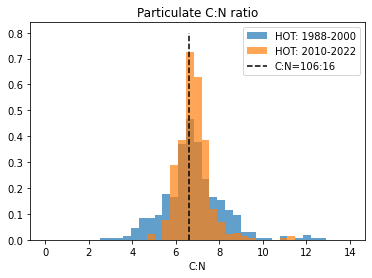

In [10]:
plt.hist(HOT_bottle[ind1]['pc_bottle_hot']/HOT_bottle[ind1]['pn_bottle_hot'],
         bins=np.linspace(0,14,40),density=True, alpha=0.7,
         label='HOT: 1988-2000');
plt.hist(HOT_bottle[ind2]['pc_bottle_hot']/HOT_bottle[ind2]['pn_bottle_hot'],
         bins=np.linspace(0,14,40),density=True, alpha=0.7,
         label='HOT: 2010-2022');
plt.plot([106/16, 106/16],[0, 0.8],'k--',label='C:N=106:16')
plt.legend()
plt.title('Particulate C:N ratio')
plt.xlabel('C:N');